In [1]:
%matplotlib notebook
%matplotlib inline

import os
from packaging import version
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })
import warnings
warnings.filterwarnings('ignore')


In [2]:
# experiment_id, experiment_name = "6yl48QRjSySDUpTg8TpeRw", "st_uc-bg_bigBugfixMetric_bs4_split_1_1_trial1_29d20f8"
# experiment_id, experiment_name = "zNo4qyA5RBybC9m0sPRiZw", "st_uc-bg_bigBugfixMetric_bs4_split_1_1_trial1_b4f39ae"
# experiment_id, experiment_name = "7M4Qi6dmQteoRpuOibFbWQ", "st_fg_uc_bg_pl_o_95_85_85_s_0_26729b3"

# experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
# df = experiment.get_scalars()
# df.to_csv(f"metrics_{experiment_name}.csv", index=False)

# df = pd.read_csv(f"metrics_{experiment_name}.csv")

In [3]:
# def draw_metrics(dfs, fname, tags=None, tag_names=None, threshs=None, y_label=None, colors=None):
#     f, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4))
#     base_run = "tensorboard"
#     if y_label is None:
#         y_label = "ROI IoU wrt. pseudo-labels"
#     # classes = ["Car", "Pedestrian", "Cyclist"]
#     classes = ["Car", "Pedestrian"]
#     if tags is None:
#         tags = ["rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_tp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fn"]
#     if tag_names is None:
#         tag_names = ["True Positive ROIs", "False Positive ROIs", "False Negative ROIs"]
#     if colors is None : 
#         colors = ['green', 'blue', 'red']
#     for j, cls in enumerate(classes):
#         for exp in range(2):
#             df = dfs[exp]
#             for k, (tag, tname, color) in enumerate(zip(tags, tag_names, colors)):
#                 tname += '/after' if exp == 1 else '/before'
#                 linestyle = 'solid' if exp == 1 else 'dashed'
#                 run = base_run + "/" + tag + "/" + cls
#                 steps = df[df.run == run].step
#                 values = df[df.run == run].value
#                 smooth_values = df[df.run == run].ewm(alpha=0.2).mean().value
#                 if j == 0:
#                     lines = axes[j].plot(steps, values, alpha=0.1, color=color)
#                     axes[j].plot(steps, smooth_values, label=tname, color=color, linestyle=linestyle)
#                     axes[j].set_ylabel(y_label)
#                 else:
#                     lines = axes[j].plot(steps, values, alpha=0.1, color=color)
#                     axes[j].plot(steps, smooth_values, color=color, linestyle=linestyle)

#             axes[j].yaxis.set_tick_params(labelleft=True)

#             if j == 0:
#                 if threshs is not None:
#                     axes[j].axhline(y=threshs[j], linestyle="dashed", label="$\\tau$")
#             if j == 1 or j == 2:
#                 if threshs is not None:
#                     axes[j].axhline(y=threshs[j], linestyle="dashed")
#                 axes[j].yaxis.set_tick_params(labelleft=False)

#             axes[j].set_title(cls)
#             axes[j].xaxis.set_tick_params(labelbottom=False)
#             axes[j].set_xlabel("Training iterations")

#     axes[0].legend()
#     f.tight_layout()
#     f.subplots_adjust(wspace=0.02, hspace=0.02)
#     f.savefig(fname=fname, transparent=False, bbox_inches='tight')

In [4]:
# def draw_metrics_iou(dfs, fname, tags=None, tag_names=None, threshs=None, y_label=None, colors = None):
#     # f, axes = plt.subplots(1, 3, sharey=True, figsize=(13,4))
#     f, axes = plt.subplots(2, 3, sharey=True, figsize=(10,5))
#     base_run = "tensorboard"
#     if y_label is None:
#         y_label = "ROI IoU wrt. pseudo-labels"
#     # classes = ["Car", "Pedestrian", "Cyclist"]
#     classes = ["Car", "Pedestrian"]
#     if tags is None:
#         tags = ["rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_tp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fn"]
#     if tag_names is None:
#         tag_names = ["True Positive ROIs", "False Positive ROIs", "False Negative ROIs"]
#     if colors is None : 
#         colors = ['green', 'blue', 'red']
#     for i in range(2):
#         df = dfs[i]
#         for j, cls in enumerate(classes):
#             for k, (tag, tname, color) in enumerate(zip(tags, tag_names, colors)):
#                 run = base_run + "/" + tag + "/" + cls
#                 steps = df[df.run == run].step
#                 values = df[df.run == run].value
#                 smooth_values = df[df.run == run].ewm(alpha=0.2).mean().value
#                 if j == 0:
#                     lines = axes[i, j].plot(steps, values, alpha=0.2, color=color)
#                     axes[i, j].plot(steps, smooth_values, label=tname, color=color)
#                     axes[i, j].set_ylabel(y_label)
#                 else:
#                     lines = axes[i, j].plot(steps, values, alpha=0.2, color=color)
#                     axes[i, j].plot(steps, smooth_values, color=color)

#             axes[i, j].yaxis.set_tick_params(labelleft=True)

#             if j == 0:
#                 if threshs is not None:
#                     axes[i, j].axhline(y=threshs[i, j], linestyle="dashed", label="$\\tau$")
#             if j == 1 or j == 2:
#                 if threshs is not None:
#                     axes[i, j].axhline(y=threshs[i, j], linestyle="dashed")
#                 axes[i, j].yaxis.set_tick_params(labelleft=False)
#             if i == 0:
#                 axes[i, j].set_title(cls)
#                 axes[i, j].xaxis.set_tick_params(labelbottom=False)
#             if i == 1:
#                 axes[i, j].set_xlabel("Training iterations")

#     axes[0, 0].legend()
#     f.tight_layout()
#     f.subplots_adjust(wspace=0.02, hspace=0.02)
#     f.savefig(fname=fname, transparent=False, bbox_inches='tight')

In [5]:
# def draw_metrics_correlation(dfs, fname, tags=None, tag_names=None, threshs=None, y_label=None, colors=None):
#     f, axes = plt.subplots(2, 1, sharey=True, figsize=(5,5))
#     base_run = "tensorboard"
#     # classes = ["Car", "Pedestrian", "Cyclist"]
#     classes = ["Car", "Pedestrian"]
#     x_y_values = ["rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl", "rcnn_roi_pl_gt_metrics_cls/pred_weight"]
#     tags = ["tp", "fp", "fn"]
#     if colors is None : 
#         colors = ['green', 'blue', 'red']
#     subplot_titles = ['Before', 'After']
#     df = dfs[1]
#     for cls_idx, cls in enumerate(classes):
#         for tag_idx, (tag, color) in enumerate(zip(tags, colors)):
#             iou_tag = base_run + "/" + x_y_values[0] + "_" + tag + "/" + cls
#             weight_tag = base_run + "/" + x_y_values[1] + "_" + tag + "/" + cls
#             weight = df[df.run == weight_tag].value
#             iou = df[df.run == iou_tag].value
#             if cls_idx == 0:
#                 axes[cls_idx].scatter(iou, weight, label=tag, color=color, alpha = 0.5)
#             else:
#                 axes[cls_idx].scatter(iou, weight, color=color, alpha = 0.5)
#             axes[cls_idx].yaxis.set_tick_params(labelleft=True)
        
#         axes[cls_idx].set_title(cls)
#         axes[cls_idx].xaxis.set_tick_params(labelbottom=False)
#         axes[cls_idx].set_xlabel("IoUs")
#         axes[cls_idx].set_ylabel(y_label)
#         axes[cls_idx].legend()

#     f.tight_layout()
#     f.subplots_adjust(wspace=0.02, hspace=0.2)
#     f.savefig(fname=fname, transparent=False, bbox_inches='tight')

In [6]:
# def draw_metrics_fg_ious_old(dfs, fname, tags=None, tag_names=None, threshs=None, y_label=None, colors=None):
#     f, axes = plt.subplots(2, 1, sharey=True, figsize=(6,6))
#     base_run = "tensorboard"
#     if y_label is None:
#         y_label = "ROI IoU wrt. pseudo-labels"
#     classes = ["Car", "Pedestrian", "Cyclist"]
#     # classes = ["Car", "Pedestrian"]
#     if tags is None:
#         tags = ["rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_tp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fn"]
#     if tag_names is None:
#         tag_names = ["True Positive ROIs", "False Positive ROIs", "False Negative ROIs"]
#     if colors is None : 
#         colors = ['green', 'blue', 'red']
#     subplot_titles = ['Before', 'After']
#     for j in range(len(subplot_titles)):
#         df = dfs[j]
#         for cls_idx, (cls, color) in enumerate(zip(classes, colors)):
#             for k, (tag, tname) in enumerate(zip(tags, tag_names)):
#                 run = base_run + "/" + tag + "/" + cls
#                 steps = df[df.run == run].step
#                 values = df[df.run == run].value
#                 smooth_values = df[df.run == run].ewm(alpha=0.2).mean().value
#                 if j == 0:
#                     # lines = axes[j].plot(steps, values, alpha=0.1, color=color)
#                     axes[j].plot(steps, smooth_values, label=cls, color=color)
#                     sns.lineplot(ax=axes[j], data=smooth_values, x=steps, linewidth=2.5)
#                 else:
#                     # lines = axes[j].plot(steps, values, alpha=0.1, color=color)
#                     # axes[j].plot(steps, smooth_values, color=color)
#                     sns.lineplot(ax=axes[j], data=smooth_values, x=steps, linewidth=2.5)
#                 axes[j].yaxis.set_tick_params(labelleft=True)

#             if j == 0 and cls_idx == 0:
#                 if threshs is not None:
#                     axes[j].axhline(y=threshs[j][cls_idx], linestyle="dashed", label="$\\tau$", color='black')
#             if j == 1:
#                 if threshs is not None:
#                     axes[j].axhline(y=threshs[j][cls_idx], linestyle="dashed", label=("$\\tau_{cls}}$".replace('cls', cls)), color=color)
#                 axes[j].yaxis.set_tick_params(labelleft=True)

#         # axes[j].set_title(subplot_titles[j])
#         axes[j].xaxis.set_tick_params(labelbottom=False)
#         axes[j].set_xlabel("Training iterations")
#         axes[j].set_ylabel(y_label)
#         axes[j].legend()

#     f.tight_layout()
#     f.subplots_adjust(wspace=0.02, hspace=0.02)
#     f.savefig(fname=fname, transparent=False, bbox_inches='tight')

Draw metrics for FG IoUs between ROIs and PLs

In [7]:
# def draw_metrics_fg_ious(dfs, fname, tags=None, tag_names=None, threshs=None, y_label=None, colors=None):
#     f, axes = plt.subplots(2, 1, sharey=True, figsize=(6,4))
#     base_run = "tensorboard"
#     if y_label is None:
#         y_label = "ROI IoU wrt. pseudo-labels"
#     classes = ["Car", "Pedestrian", "Cyclist"]
#     if tags is None:
#         tags = ["rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_tp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fn"]
#     if tag_names is None:
#         tag_names = ["True Positive ROIs", "False Positive ROIs", "False Negative ROIs"]
#     if colors is None : 
#         colors = sns.color_palette('tab10', len(classes))
#         palette = {mode: color for mode, color in zip(classes, colors)}
#     subplot_titles = ['Before', 'After']
    
#     for j in range(len(subplot_titles)):
#         df = dfs[j]
#         classwise_df=pd.DataFrame()
#         for cls_idx, (cls, color) in enumerate(zip(classes, colors)):
#             for k, (tag, tname) in enumerate(zip(tags, tag_names)):
#                 run = base_run + "/" + tag + "/" + cls
#                 steps = df[df.run == run].step
#                 values = df[df.run == run].value
#                 smooth_values = df[df.run == run].ewm(alpha=0.2).mean().value
#                 # store all classwise IoUs in a single dataframe and plot all at once
#                 classwise_df[cls] = smooth_values.reset_index(drop=True)
            
#             # plot threshold lines 
#             if j == 0 and cls_idx == 0:
#                 if threshs is not None:
#                     axes[j].axhline(y=threshs[j][cls_idx], linestyle="dashed", label="$\\tau$", color='black', alpha=0.9)
#             if j == 1:
#                 if threshs is not None:
#                     axes[j].axhline(y=threshs[j][cls_idx], linestyle="dashed", label=("$\\tau_{cls}$".replace('cls', cls)), color=color, alpha=0.9)
#                 axes[j].yaxis.set_tick_params(labelleft=True)
        
#         # plot ious
#         if j == 0:
#             sns.lineplot(ax=axes[j], data=classwise_df, linewidth=1.5, dashes=False, legend = False, palette=palette)
#         else:
#             sns.lineplot(ax=axes[j], data=classwise_df, linewidth=1.5, dashes=False, legend = True, palette=palette)
        
#         # x/y ticks
#         axes[j].set_yticks(np.arange(0.15, 0.8, 0.15))
#         axes[j].yaxis.set_tick_params(labelleft=True, labelsize='small')
#         axes[j].xaxis.set_tick_params(labelbottom=False)
#         axes[j].yaxis.grid(True)
#         # legends
#         handles, labels = axes[j].get_legend_handles_labels()
#         order = [0,3,1,4,2,5] if j == 1 else [0]

#         # Add IoU in legends if needed using below code
#         # Note : Needs latex related libraries installed in the env
#         # new_labels = []
#         # new_handles = []
#         # for idx in order:
#         #     new_handles.append(handles[idx])
#         #     if idx%2!=0:
#         #         new_labels.append(r"IoU_{cls}")
#         #     else:
#         #         new_labels.append(labels[idx])
#         # legend = axes[j].legend(new_handles,new_labels, frameon = 1, ncol=3)
#         legend = axes[j].legend([handles[idx] for idx in order], [labels[idx] for idx in order], \
#                                 frameon = 1, ncol=3, fontsize='small')
#         frame = legend.get_frame()
#         frame.set_color('white')
#         frame.set_edgecolor('black')

#     # common plot labels
#     f.text(0.5, 0.01, "Training iterations", ha='center')
#     f.text(0, 0.5, y_label, va='center', rotation='vertical')
#     f.tight_layout()
#     f.subplots_adjust(wspace=0.02, hspace=0.04)
#     f.savefig(fname=fname, transparent=False, bbox_inches='tight')

In [8]:
# # Plot setting and theme
# plt.style.use('seaborn')
# sns.set_theme(style="ticks", palette="tab10", rc={
#     'xtick.bottom': False,
#     'ytick.left': True,
# })

# # --------------- Ablation 1 ---------------
# exp_id_ab1_default, exp_name_ab1_default = "dTrxKmgMRQK122Hm1cmaPA", "ablation1_bs8_split_1_1_trial_3_5802d99"
# exp_id_ab1_ours, exp_name_ab1_ours = "f5nMZ6K9SySkIYEEP1J2jw", "st_fg_uc_bg_pl_o_95_85_85_s_0_26729b3"
# df_ab1_default = pd.read_csv(f"metrics_{exp_name_ab1_default}.csv")
# df_ab1_ours = pd.read_csv(f"metrics_{exp_name_ab1_ours}.csv")
# dfs = [df_ab1_default, df_ab1_ours]

# # --------------- Raw IoUs based on FG ---------------
# tags = ["rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fg"]
# y_label = "FG IoUs of ROIs and pseudo-labels"
# # tag_names = ["FG IoUs of ROIs and pseudo-labels"]
# fname = f"fg_roi_iou_wrt_pl_ab1_default_{exp_name_ab1_default}.png"
# threshs = np.array([[0.75, 0.75, 0.75], [0.65, 0.45, 0.4]])
# draw_metrics_fg_ious(dfs=dfs, fname=fname, threshs=threshs, tags=tags, y_label=y_label)

In [9]:
# # --------------- TP/FP/FN rates ---------------
# tags = ["rcnn_roi_pl_gt_metrics_cls/pred_tp_rate", "rcnn_roi_pl_gt_metrics_cls/pred_fp_ratio", "rcnn_roi_pl_gt_metrics_cls/pred_fn_rate"]
# tag_names = ["TP Rate", "FP Ratio", "FN Rate"]
# y_label = "Ratio"
# colors = ['green', 'blue', 'red']
# draw_metrics(dfs=dfs, fname=f"fp_fn_{exp_name_ab1_default}.png", tags=tags[1:], y_label=y_label, tag_names=tag_names[1:], colors = colors[1:])
# draw_metrics(dfs=dfs, fname=f"tp_{exp_name_ab1_default}.png", tags=[tags[0]], y_label=y_label, tag_names=[tag_names[0]])

# # --------------- TP/FP/FN weights ---------------
# tags = ["rcnn_roi_pl_gt _metrics_cls/pred_weight_tp", "rcnn_roi_pl_gt_metrics_cls/pred_weight_fp", "rcnn_roi_pl_gt_metrics_cls/pred_weight_fn"]
# tag_names = ["TP weights", "FP weights", "FN weights"]
# y_label = "Mean assignment weight"
# draw_metrics(dfs=dfs, fname=f"pred_weights_tp_fp_fn_{exp_name_ab1_default}.png", tags=tags, y_label=y_label, tag_names=tag_names)

# # --------------- Raw IoUs based on TP/FP/FN ---------------
# tags = ["rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_tp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fn"]
# y_label = "ROI IoU wrt. pseudo-labels"
# fname = f"roi_iou_wrt_pl_ab1_default_{exp_name_ab1_default}.png"
# threshs = np.array([[0.75, 0.75, 0.75], [0.65, 0.45, 0.4]])
# draw_metrics_iou(dfs=dfs, fname=fname, threshs=threshs, tags=tags, y_label=y_label)

# # --------------- Correlation between FG IoUs and weights ---------------
# tags = ["rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fg", "rcnn_roi_pl_gt _metrics_cls/pred_weight_fg"]
# y_label = "Weights"
# # tag_names = ["FG ROI IoU wrt. pseudo-labels"]
# fname = f"correlation_ab1_default_{exp_name_ab1_default}.png"
# # threshs = np.array([[0.75, 0.75, 0.75], [0.65, 0.45, 0.4]])
# draw_metrics_correlation(dfs=dfs, fname=fname, tags=tags, y_label=y_label)

In [10]:
import pandas as pd
import numpy as np
import torch
from matplotlib.colors import ListedColormap
plt.style.use('seaborn')
sns.set_theme(style="ticks", palette="tab10", rc={
    'xtick.bottom': False,
    'ytick.left': False,
})
cmap = ListedColormap(sns.color_palette("tab10"))

df = pd.read_pickle(r'/mnt/data/shag01/pcdet-st-reliable/OpenPCDet/tools/ious.pkl')

tensor_data = {'iou_roi_pl': torch.Tensor(df['iou_roi_pl']), 'iou_roi_gt': torch.Tensor(df['iou_roi_gt']),
                'pred_scores': torch.sigmoid(torch.Tensor(df['pred_scores'])) , 'class_labels': torch.Tensor(df['class_labels']),
                'iteration': torch.Tensor(df['iteration'])}
tensor_df = pd.DataFrame(tensor_data)
tensor_df['class_labels'] = tensor_df['class_labels'].map({1:'Car', 2:'Pedestrian', 3:'Cyclist'})

In [11]:
# # valid_mask = ~((torch.Tensor(df['iou_roi_pl'])<0.25) & (torch.Tensor(df['iou_roi_gt']) < 0.25))
# # valid_mask = torch.Tensor(df['iteration']).int() == int(max(df['iteration']))
# # valid_mask = torch.Tensor(df['iteration']).int() == 0

# # valid_mask = torch.Tensor(df['iteration']).int() > 1392
# valid_mask = torch.Tensor(df['iteration']).int() < 47
# valid_mask = valid_mask & ((torch.Tensor(df['class_labels'])).int() == 2)
# scatter_data = {'iou_roi_pl': torch.Tensor(df['iou_roi_pl'])[valid_mask], 
#                 'iou_roi_gt': torch.Tensor(df['iou_roi_gt'])[valid_mask],
#                 'class_labels': torch.Tensor(df['class_labels'])[valid_mask],
#                 'epoch': 'first'}
# scatter_df1 = pd.DataFrame(scatter_data)
# scatter_df1['class_labels'] = scatter_df1['class_labels'].map({1:'Car', 2:'Pedestrian', 3:'Cyclist'})


# # valid_mask = ~((torch.Tensor(df['iou_roi_pl'])<0.25) & (torch.Tensor(df['iou_roi_gt']) < 0.25))
# # valid_mask = torch.Tensor(df['iteration']).int() == int(max(df['iteration']))
# # valid_mask = torch.Tensor(df['iteration']).int() == 0

# valid_mask = torch.Tensor(df['iteration']).int() > 1392
# # valid_mask = torch.Tensor(df['iteration']).int() < 47
# valid_mask = valid_mask & ((torch.Tensor(df['class_labels'])).int() == 2)
# scatter_data = {'iou_roi_pl': torch.Tensor(df['iou_roi_pl'])[valid_mask], 
#                 'iou_roi_gt': torch.Tensor(df['iou_roi_gt'])[valid_mask],
#                 'class_labels': torch.Tensor(df['class_labels'])[valid_mask],
#                 'epoch': 'last'}
# scatter_df2 = pd.DataFrame(scatter_data)
# scatter_df2['class_labels'] = scatter_df2['class_labels'].map({1:'Car', 2:'Pedestrian', 3:'Cyclist'})



# df = pd.concat([scatter_df1, scatter_df2], ignore_index=True)
# sns.scatterplot(data=df, x="iou_roi_pl", y="iou_roi_gt", hue="epoch", style_order = ['Car', 'Pedestrian', 'Cyclist']).set(title='Epoch wise IoUs for Pedestrian')
# legend = plt.legend(frameon=True)
# frame = legend.get_frame()
# frame.set_color('white')
# frame.set_edgecolor('black')

In [12]:
valid_mask = torch.Tensor(df['iteration']).int() > 1392
valid_mask = valid_mask & ((torch.Tensor(df['class_labels'])).int() == 1)
valid_mask = valid_mask & ~((torch.Tensor(df['iou_roi_pl'])<0.25) & (torch.Tensor(df['iou_roi_gt']) < 0.25))

dist_data = {'iou_roi_pl': torch.Tensor(df['iou_roi_pl'])[valid_mask], 
            'iou_roi_gt': torch.Tensor(df['iou_roi_gt'])[valid_mask],
            'class_labels': torch.Tensor(df['class_labels'])[valid_mask]}
dist_df2 = pd.DataFrame(dist_data)
dist_df2['class_labels'] = dist_df2['class_labels'].map({1:'Car', 2:'Pedestrian', 3:'Cyclist'})
#tomato, royalblue, seagreen
g0 = sns.jointplot(data=dist_df2, x="iou_roi_pl", y="iou_roi_gt", alpha=0.5)
g0.set_axis_labels('$IoU_{RoI,PL}$', '$IoU_{RoI,GT}$', fontsize=12)
plt.axvline(x=0.65, ymin=0, ymax=1, linestyle='--', color='red', label="$\\tau_{local}=0.65$", alpha = 0.7, lw=2.5)
plt.axvline(x=0.25, ymin=0, ymax=1, linestyle='--', color='orange', label="$\\tau_{local}=0.25$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.7, xmin=0, xmax=1, linestyle='--', color='black', label="$\\tau=0.70$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.25, xmin=0, xmax=1, linestyle='--', color='orange', label="$\\tau=0.25$", alpha = 0.7, lw=2.5)
legend = plt.legend(frameon=True, fontsize=10, loc='lower left', borderpad=0.2, framealpha = 0.6)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

In [13]:
valid_mask = torch.Tensor(df['iteration']).int() > 0#1392
valid_mask = valid_mask & ((torch.Tensor(df['class_labels'])).int() == 2)
valid_mask = valid_mask & ~((torch.Tensor(df['iou_roi_pl'])<0.25) & (torch.Tensor(df['iou_roi_gt']) < 0.25))

dist_data = {'iou_roi_pl': torch.Tensor(df['iou_roi_pl'])[valid_mask], 
            'iou_roi_gt': torch.Tensor(df['iou_roi_gt'])[valid_mask],
            'class_labels': torch.Tensor(df['class_labels'])[valid_mask]}
dist_df2 = pd.DataFrame(dist_data)
dist_df2['class_labels'] = dist_df2['class_labels'].map({1:'Car', 2:'Pedestrian', 3:'Cyclist'})

g1 = sns.jointplot(data=dist_df2, x="iou_roi_pl", y="iou_roi_gt", alpha=0.5)
g1.set_axis_labels('$IoU_{RoI,PL}$', '$IoU_{RoI,GT}$', fontsize=12)
plt.axvline(x=0.45, ymin=0, ymax=1, linestyle='--', color='red', label="$\\tau_{local}=0.45$", alpha = 0.7, lw=2.5)
plt.axvline(x=0.25, ymin=0, ymax=1, linestyle='--', color='orange', label="$\\tau_{local}=0.25$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.5, xmin=0, xmax=1, linestyle='--', color='black', label="$\\tau=0.5$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.25, xmin=0, xmax=1, linestyle='--', color='orange', label="$\\tau=0.25$", alpha = 0.7, lw=2.5)
g1.fig.suptitle("Pedestrian")
legend = plt.legend(frameon=True, fontsize=10, loc='lower left', borderpad=0.2, framealpha = 0.6)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

In [14]:
valid_mask = torch.Tensor(df['iteration']).int() > 0#1392
valid_mask = valid_mask & ((torch.Tensor(df['class_labels'])).int() == 3)
valid_mask = valid_mask & ~((torch.Tensor(df['iou_roi_pl'])<0.25) & (torch.Tensor(df['iou_roi_gt']) < 0.25))

dist_data = {'iou_roi_pl': torch.Tensor(df['iou_roi_pl'])[valid_mask], 
            'iou_roi_gt': torch.Tensor(df['iou_roi_gt'])[valid_mask],
            'class_labels': torch.Tensor(df['class_labels'])[valid_mask]}
dist_df2 = pd.DataFrame(dist_data)
dist_df2['class_labels'] = dist_df2['class_labels'].map({1:'Car', 2:'Pedestrian', 3:'Cyclist'})

# sns.displot(data=dist_df2, x="iou_roi_pl", y="iou_roi_gt", binwidth=(0.05, 0.05), cbar=True).set(title='IoUs for Pedestrian')

g2 = sns.jointplot(data=dist_df2, x="iou_roi_pl", y="iou_roi_gt", alpha=0.5)
g2.set_axis_labels('$IoU_{RoI,PL}$', '$IoU_{RoI,GT}$', fontsize=12)
plt.axvline(x=0.4, ymin=0, ymax=1, linestyle='--', color='red', label="$\\tau_{local}=0.4$", alpha = 0.7, lw=2.5)
plt.axvline(x=0.25, ymin=0, ymax=1, linestyle='--', color='orange', label="$\\tau_{local}=0.25$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.5, xmin=0, xmax=1, linestyle='--', color='black', label="$\\tau=0.5$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.25, xmin=0, xmax=1, linestyle='--', color='orange', label="$\\tau=0.25$", alpha = 0.7, lw=2.5)
g2.fig.suptitle("Cyclist")
legend = plt.legend(frameon=True, fontsize=10, loc='lower left', borderpad=0.2, framealpha = 0.6)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

In [15]:
g3 = sns.jointplot(data=dist_df2, x="iou_roi_pl", y="iou_roi_gt", alpha=0.5)
g3.set_axis_labels('$IoU_{RoI,PL}$', '$IoU_{RoI,GT}$', fontsize=12)
plt.axvline(x=0.65, ymin=0, ymax=1, linestyle='--', color='red', label="$\\tau_{local}=0.65$", alpha = 0.7, lw=2.5)
plt.axvline(x=0.25, ymin=0, ymax=1, linestyle='--', color='orange', label="$\\tau_{local}=0.25$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.7, xmin=0, xmax=1, linestyle='--', color='black', label="$\\tau=0.70$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.25, xmin=0, xmax=1, linestyle='--', color='orange', label="$\\tau=0.25$", alpha = 0.7, lw=2.5)
g3.fig.suptitle("Car")
legend = plt.legend(frameon=True, fontsize=10, loc='lower left', borderpad=0.2, framealpha = 0.6)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

g4 = sns.jointplot(data=dist_df2, x="iou_roi_pl", y="iou_roi_gt", alpha=0.5)
g4.set_axis_labels('$IoU_{RoI,PL}$', '$IoU_{RoI,GT}$', fontsize=12)
plt.axvline(x=0.45, ymin=0, ymax=1, linestyle='--', color='red', label="$\\tau_{local}=0.45$", alpha = 0.7, lw=2.5)
plt.axvline(x=0.25, ymin=0, ymax=1, linestyle='--', color='orange', label="$\\tau_{local}=0.25$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.5, xmin=0, xmax=1, linestyle='--', color='black', label="$\\tau=0.5$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.25, xmin=0, xmax=1, linestyle='--', color='orange', label="$\\tau=0.25$", alpha = 0.7, lw=2.5)
g4.fig.suptitle("Pedestrian")
legend = plt.legend(frameon=True, fontsize=10, loc='lower left', borderpad=0.2, framealpha = 0.6)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

g5 = sns.jointplot(data=dist_df2, x="iou_roi_pl", y="iou_roi_gt", alpha=0.5)
g5.set_axis_labels('$IoU_{RoI,PL}$', '$IoU_{RoI,GT}$', fontsize=12)
plt.axvline(x=0.4, ymin=0, ymax=1, linestyle='--', color='red', label="$\\tau_{local}=0.4$", alpha = 0.7, lw=2.5)
plt.axvline(x=0.25, ymin=0, ymax=1, linestyle='--', color='orange', label="$\\tau_{local}=0.25$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.5, xmin=0, xmax=1, linestyle='--', color='black', label="$\\tau=0.5$", alpha = 0.7, lw=2.5)
plt.axhline(y=0.25, xmin=0, xmax=1, linestyle='--', color='orange', label="$\\tau=0.25$", alpha = 0.7, lw=2.5)
g5.fig.suptitle("Cyclist")
legend = plt.legend(frameon=True, fontsize=10, loc='lower left', borderpad=0.2, framealpha = 0.6)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

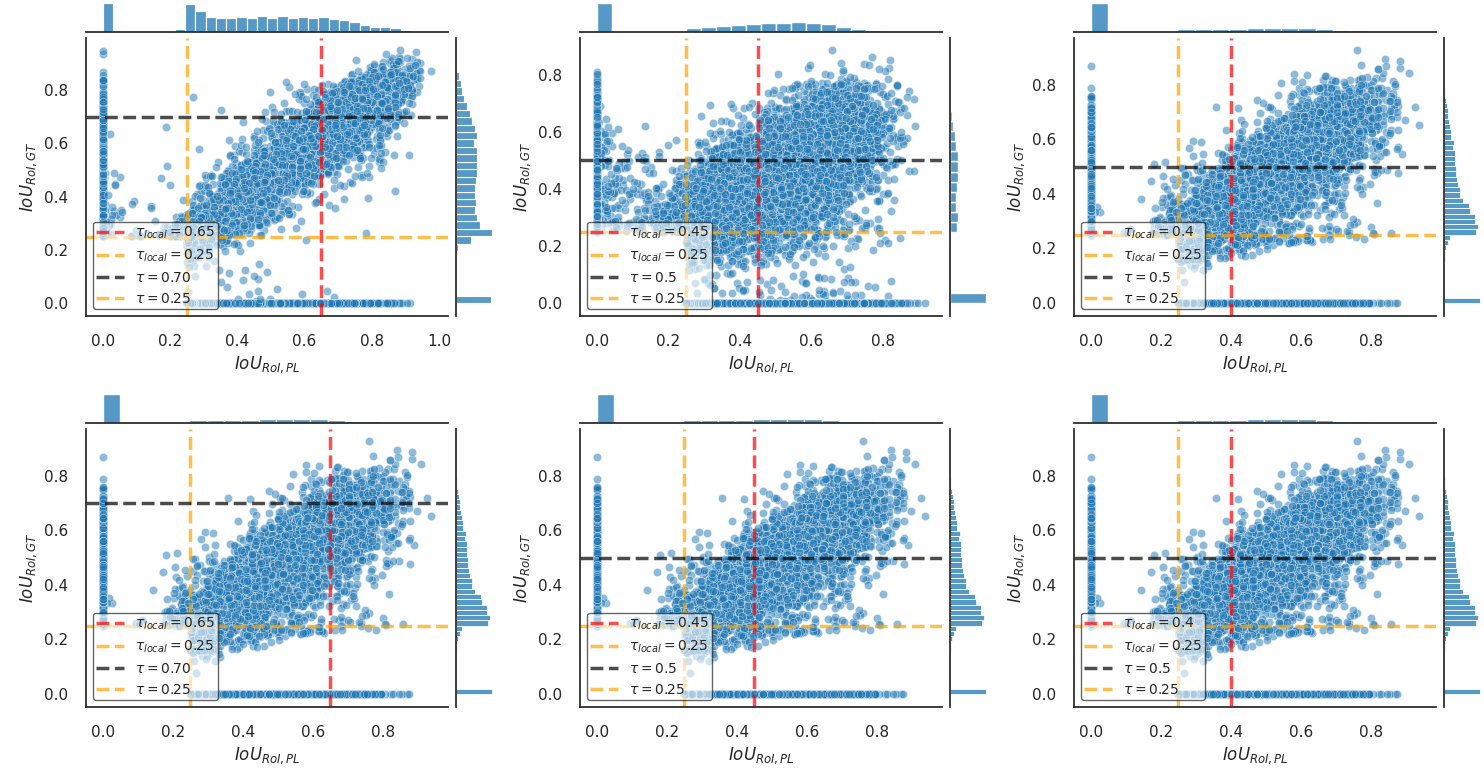

In [21]:
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

fig = plt.figure(figsize=(15,8))
gs = gridspec.GridSpec(2, 3)

#before
mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])

#after
mg3 = SeabornFig2Grid(g3, fig, gs[3])
mg4 = SeabornFig2Grid(g4, fig, gs[4])
mg5 = SeabornFig2Grid(g5, fig, gs[5])

gs.tight_layout(fig)
fig.savefig(fname="ious.png", transparent=False, bbox_inches='tight')
plt.show()

In [17]:
# convert list to tensors
iou_roi_pl = torch.Tensor(df['iou_roi_pl'])
iou_roi_gt = torch.Tensor(df['iou_roi_gt'])
pred_scores = torch.sigmoid(torch.Tensor(df['pred_scores'])) # normlalise pred scores
class_labels = torch.Tensor(df['class_labels'])
iteration = torch.Tensor(df['iteration'])
print("Total iterations: ", iteration[-1].item())

# map (0,1439) iterations to (1,8), can be changed later
last_iter = int(max(df['iteration']))
interval_range = last_iter // 8
mapped_iteration = torch.Tensor([int(max(1, min((iter+(interval_range-1))//interval_range, 8))) for iter in df['iteration']])

# create classwise masks and extract their corresponding scores
class_to_num = {'Car': 1, 'Pedestrian': 2, 'Cyclist': 3}
scores_df = pd.DataFrame()
scores_df = {'iou_roi_pl': {'Car': None, 'Pedestrian': None, 'Cyclist': None}, 
            'iou_roi_gt': {'Car': None, 'Pedestrian': None, 'Cyclist': None}, 
            'pred_scores': {'Car': None, 'Pedestrian': None, 'Cyclist': None},
            'mapped_iteration': {'Car': None, 'Pedestrian': None, 'Cyclist': None}}
for class_name, class_val in class_to_num.items():
    scores_df['iou_roi_pl'][class_name] = iou_roi_pl[class_labels==class_val]
    scores_df['iou_roi_gt'][class_name] = iou_roi_gt[class_labels==class_val]
    scores_df['pred_scores'][class_name] = pred_scores[class_labels==class_val]
    scores_df['mapped_iteration'][class_name] = mapped_iteration[class_labels==class_val]
    
    print(scores_df['iou_roi_pl'][class_name].shape, scores_df['iou_roi_gt'][class_name].shape, 
        scores_df['pred_scores'][class_name].shape, scores_df['mapped_iteration'][class_name].shape)


Total iterations:  1439.0
torch.Size([587178]) torch.Size([587178]) torch.Size([587178]) torch.Size([587178])
torch.Size([93128]) torch.Size([93128]) torch.Size([93128]) torch.Size([93128])
torch.Size([28942]) torch.Size([28942]) torch.Size([28942]) torch.Size([28942])


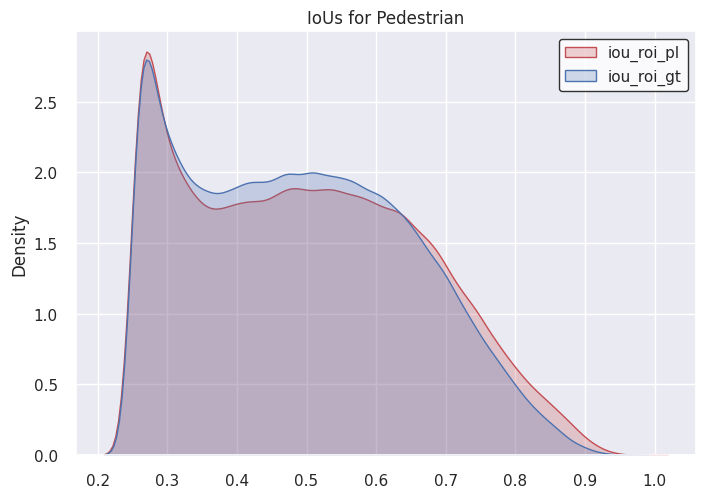

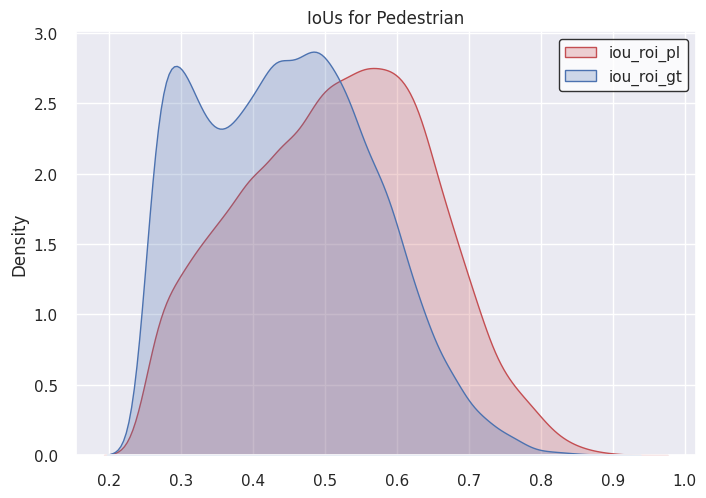

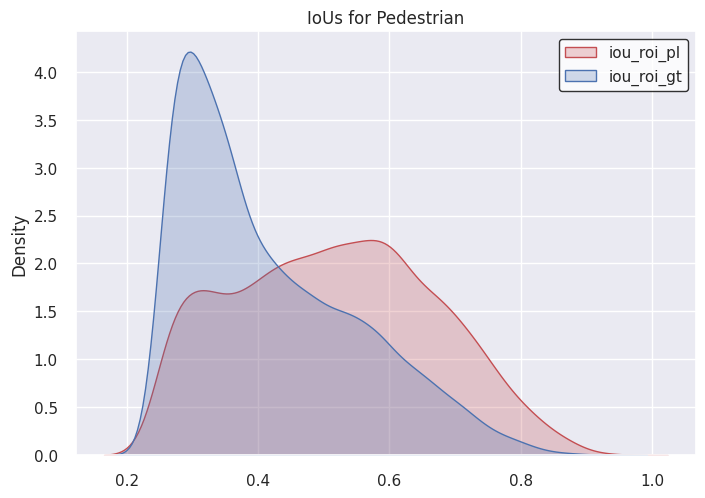

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

for cls in ['Car','Pedestrian', 'Cyclist'] :
    fig = sns.kdeplot(scores_df['iou_roi_pl'][cls][scores_df['iou_roi_pl'][cls] > 0.25], shade=True, color="r", label='iou_roi_pl').set_title("IoUs for Pedestrian")
    fig = sns.kdeplot(scores_df['iou_roi_gt'][cls][scores_df['iou_roi_gt'][cls] > 0.25], shade=True, color="b", label='iou_roi_gt')
    legend = plt.legend(frameon=True)
    frame = legend.get_frame()
    frame.set_color('white')
    frame.set_edgecolor('black')
    plt.show()


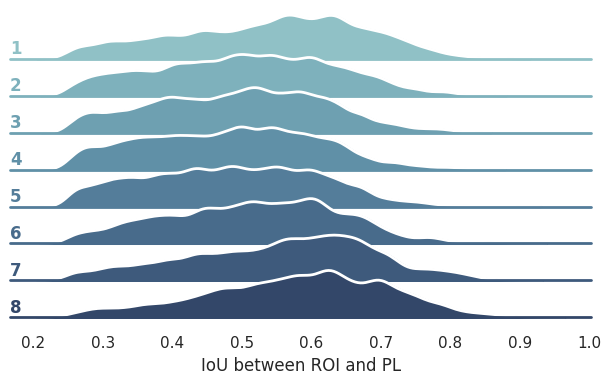

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
class_name = "Pedestrian"
x = scores_df['iou_roi_pl'][class_name][scores_df['iou_roi_pl'][class_name] > 0.25]
g = scores_df['mapped_iteration'][class_name][scores_df['iou_roi_pl'][class_name] > 0.25].int()
df = pd.DataFrame()
df['IoU between ROI and PL'] = x
df['Train interval'] = g

# # Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Train interval", hue="Train interval", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "IoU between ROI and PL",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "IoU between ROI and PL", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "IoU between ROI and PL")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.show()